<a href="https://colab.research.google.com/github/ranjankr22922/Machine_Learning/blob/main/4_LRMV_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df = pd.read_csv('hiring.csv')

In [8]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=00f965921e71ce2e79b1dbb420864b62c98035331ac92bffd6457129665921cb
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [11]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [12]:
import math
test_score_median = math.floor(df['test_score(out of 10)'].median())
test_score_median

8

In [13]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(test_score_median )

In [14]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [15]:
reg = linear_model.LinearRegression()

In [16]:
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [17]:
reg.predict([[2, 9, 6]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [18]:
reg.predict([[12, 10, 10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

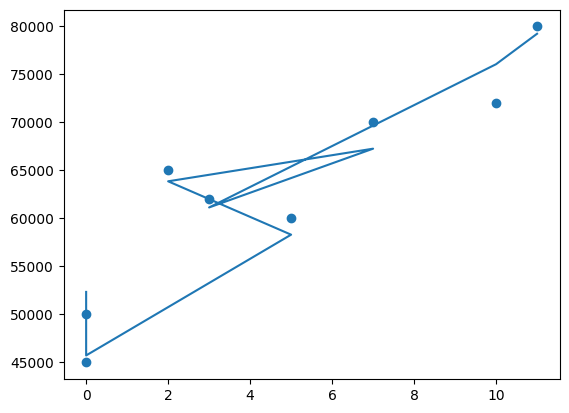

In [19]:
plt.scatter(df.experience, df['salary($)'])
plt.plot(df.experience, reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]))

In [20]:
import pickle

In [21]:
with open('model_pickle', 'wb') as f:
  pickle.dump(reg, f)

In [22]:
with open('model_pickle', 'rb') as f:
  mp = pickle.load(f)

In [25]:
mp.predict([[12, 10, 10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [28]:
import joblib

In [30]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [31]:
mj = joblib.load('model_joblib')

In [32]:
mj.predict([[12, 10, 10]])

array([92002.18340611])